<a href="https://colab.research.google.com/github/Ckaino/Phase1_Project_CK/blob/main/Copy_of_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 37.0 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Load the Movie Reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


# Split into texts and labels
texts, labels = zip(*documents)

# Convert to raw text
texts = [" ".join(text) for text in texts]

# Create a DataFrame
df = pd.DataFrame({'text': texts, 'label': labels})

# Sample the dataset
df = df.sample(500, random_state=42).reset_index(drop=True)
df.tail()

,text,label
495,it seems that i ' ve stopped enjoying movies t...,neg
496,"as a revolutionary war hero in the patriot , m...",pos
497,"when i arrived in paris in june , 1992 , i was...",neg
498,mickey mouse had better watch his back -- ther...,pos
499,"if you ' ve seen the trailers or commercials ,...",neg


In [ ]:
print(df[0:2]['text'])

0    the verdict : spine - chilling drama from horr...
1    " the 44 caliber killer has struck again . " s...
Name: text, dtype: object


In [ ]:
# Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return words

# Apply preprocessing to the corpus
df['preprocessed_text'] = df['text'].apply(lambda x: ' '.join(preprocess_text(x)))

df[['text','preprocessed_text']].head()

,text,preprocessed_text
0,the verdict : spine - chilling drama from horr...,verdict spine chilling drama horror maestro st...
1,""" the 44 caliber killer has struck again . "" s...",44 caliber killer struck starring john leguiza...
2,in the company of men made a splash at the sun...,company men made splash sundance film festival...
3,"in the year 2029 , captain leo davidson ( mark...",year 2029 captain leo davidson mark wahlberg b...
4,[ note that followups are directed to rec . ar...,note followups directed rec arts movies curren...


In [ ]:
# Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return words

# Apply preprocessing to the corpus
df['preprocessed_text'] = df['text'].apply(lambda x: ' '.join(preprocess_text(x)))

df[['preprocessed_text','text']].head()

,preprocessed_text,text
0,verdict spine chilling drama horror maestro st...,the verdict : spine - chilling drama from horr...
1,44 caliber killer struck starring john leguiza...,""" the 44 caliber killer has struck again . "" s..."
2,company men made splash sundance film festival...,in the company of men made a splash at the sun...
3,year 2029 captain leo davidson mark wahlberg b...,"in the year 2029 , captain leo davidson ( mark..."
4,note followups directed rec arts movies curren...,[ note that followups are directed to rec . ar...


eg = running, done, doing, are, stating



lemma  (dictionary) = run, do , do, am, state

stemming (root) = run, do ,do, be, stat-

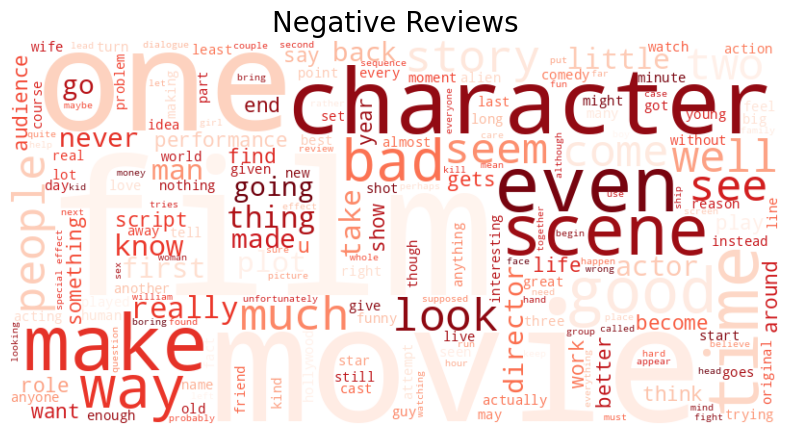

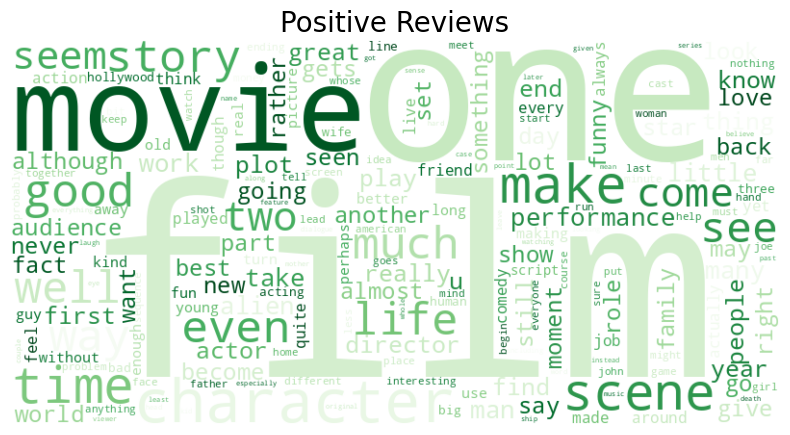

In [ ]:
# Separate the texts based on their labels
negative_texts = ' '.join(df[df['label'] == 'neg']['preprocessed_text'])
positive_texts = ' '.join(df[df['label'] == 'pos']['preprocessed_text'])

# Function to generate and plot word cloud
def plot_wordcloud(text, color, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Plot word clouds
plot_wordcloud(negative_texts, 'Reds', 'Negative Reviews')
plot_wordcloud(positive_texts, 'Greens', 'Positive Reviews')

## Vectorization

In [ ]:
df['text'][-1:]

499    if you ' ve seen the trailers or commercials ,...
Name: text, dtype: object


In [ ]:
# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['preprocessed_text'])
print("\nBag of Words:")
print(vectorizer_bow.get_feature_names_out())
print('\n')
print(X_bow.toarray())


Bag of Words:
['00' '000' '10' ... 'zundel' 'zus' 'zwick']


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
print(df['preprocessed_text'][499])
print(X_bow.toarray()[499])

seen trailers commercials rather difficult really figure movie store well hard tell watching movie well bruce willis resident future rather bleak future world population disintigrated mere 200 000 longer ruled humans animals reason 1995 organization called army 12 monkeys contaminated world pure virus thus wiping practically world population mere month bruce willis character one surviving enslaved scientists last living humans barter freedom sending assignment ultimate task go past find leader army 12 monkeys kill well explanation come easy although movie thought provoking us people future evilo world story confusing dragging know movie keeping interest fidget seat feel need look watch find hour passed terry gilliam certain style realize many appreciate watched previous work brazil movie felt like took long tell yet one realizes end near easy figure wish complex mention movie depressing reason invoke emotion
[0 1 0 ... 0 0 0]


In [ ]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['preprocessed_text'])
print("\nTF-IDF:")
print(vectorizer_tfidf.get_feature_names_out())
print(X_tfidf.toarray())


TF-IDF:
['00' '000' '10' ... 'zundel' 'zus' 'zwick']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07356023 0.         ... 0.         0.         0.        ]]


In [ ]:
# N-grams (Bigrams and Trigrams)
vectorizer_ngram = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer_ngram.fit_transform(df['preprocessed_text'])
print("\nN-grams (Bigrams and Trigrams):")
print(vectorizer_ngram.get_feature_names_out())
print(X_ngram.toarray())


N-grams (Bigrams and Trigrams):
['00 cable' '00 cable viewing' '000 000' ... 'zus hay soos'
 'zwick courage' 'zwick courage fire']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Word embeddings

In [ ]:
from gensim.models import Word2Vec, FastText
# Word2Vec
tokenized_corpus = [preprocess_text(text) for text in df['text']]
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)
print("\nWord2Vec Embedding for 'people':")
print(word2vec_model.wv['people'])



Word2Vec Embedding for 'film':
[-0.5848143   0.20130359  0.52463984  0.07827529 -0.36451584 -1.7715454
  0.86839044  2.8105109  -1.7114751  -0.53036153 -0.62763774 -2.0591767
  0.07522341  1.5064244  -1.2517298   0.57976156  1.5312021   0.03708718
 -1.6112543  -1.3349782   0.29516086  0.849323    2.5937736  -1.2482605
  1.5374353   0.7212398  -1.6712223   0.09419432 -2.317617    0.06524542
  0.600934   -0.12617345 -0.35618415  0.49087626 -0.8684223   1.1509117
  0.33118293  0.0625767   1.3511368  -1.2161961   1.4140372  -0.6107651
 -0.45873728 -0.2559809   2.9425783   0.56906754 -0.76925814 -1.2129575
  1.518476    0.8767649 ]


In [ ]:

# FastText
fasttext_model = FastText(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)
print("\nFastText Embedding for 'people':")
print(fasttext_model.wv['people'])




FastText Embedding for 'people':
[-0.09211461 -0.42654324 -0.45653272 -0.33095893 -0.55354667  0.8156483
 -0.27260625  0.7589795  -1.8418652   0.59434956  1.3222758   0.21348923
  0.88203     0.01516256 -0.41027236  0.56579274  0.86088634 -0.69897157
  0.9092981  -1.0542936   0.14472863 -0.00582775 -0.3273708   0.40879118
  0.11394655  0.19640061 -0.9963457  -0.3861968  -0.5800605  -0.06521197
  1.7546257  -0.06459494 -0.63843215  1.7368056   0.52383333 -0.40428963
 -0.41287446  0.30699366  1.5857626  -0.32750455  0.7088224   0.8714433
 -0.39111972  1.4495401  -0.12497685 -1.9461843   1.0860778  -0.5765198
 -0.12137005  0.83930284]


In [ ]:
# BERT Embeddings
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Example sentence
sentence = "I love programming"

# Tokenize and convert to input IDs
inputs = bert_tokenizer(sentence, return_tensors='pt')
input_ids = inputs['input_ids']

# Generate embeddings
with torch.no_grad():
    outputs = bert_model(input_ids)
    embeddings = outputs.last_hidden_state

print("\nBERT Embeddings for the sentence 'I love programming':")
print(embeddings)


BERT Embeddings for the sentence 'I love programming':
tensor([[[ 0.0759,  0.1909, -0.0498,  ..., -0.1828,  0.1353,  0.2446],
         [ 0.1971,  0.0060,  0.2421,  ..., -0.2658,  0.5480, -0.0281],
         [ 0.8807,  0.7064,  0.7343,  ..., -0.2093,  0.5011, -0.1847],
         [-0.0128, -0.2062, -0.1655,  ...,  0.5262,  0.2822, -0.1681],
         [ 0.6658,  0.3110, -0.2074,  ..., -0.1359, -0.7146, -0.2165]]])


## Modeling

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400,), (100,), (400,), (100,))

In [ ]:
y_train.value_counts()

,count
label,
neg,205
pos,195


### Sentiment Analysis using Naive Bayes Classifier

In [ ]:

# Create a pipeline that vectorizes text using TF-IDF and then applies a Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Evaluate the model
predicted_labels = model.predict(X_test)
from sklearn.metrics import classification_report
print("\nSentiment Analysis - Classification Report:")
print(classification_report(y_test, predicted_labels))


Sentiment Analysis - Classification Report:
              precision    recall  f1-score   support

         neg       0.70      0.92      0.79        52
         pos       0.87      0.56      0.68        48

    accuracy                           0.75       100
   macro avg       0.78      0.74      0.74       100
weighted avg       0.78      0.75      0.74       100



In [ ]:
# Predict the sentiment of a new document
new_document = ["I do not hate Coding"]
predicted_label = model.predict(new_document)
print("\nSentiment Analysis - New Document Prediction:")
print(f"Document: {new_document[0]}")
print(f"Predicted Sentiment: {predicted_label[0]}")


Sentiment Analysis - New Document Prediction:
Document: I do not hate Coding
Predicted Sentiment: neg


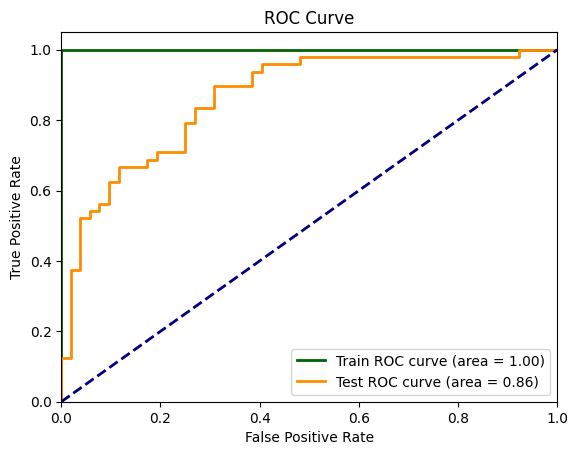

In [ ]:
# Predict probabilities for the training set
probas_train = model.predict_proba(X_train)

# Encode labels as binary (0 for 'neg' and 1 for 'pos')
y_test_binary = y_test.apply(lambda x: 0 if x == 'neg' else 1)
y_train_binary = y_train.apply(lambda x: 0 if x == 'neg' else 1)



# Compute ROC curve and ROC area for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, probas_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
# Predict probabilities for the test set
probas = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary, probas[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curves for both training and test sets
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkgreen', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### BERT model

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Convert labels to numerical values
label_map = {'neg': 0, 'pos': 1}
y_train_encoded = [label_map[label] for label in y_train]
y_test_encoded = [label_map[label] for label in y_test]

# Convert datasets to PyTorch tensors
X_train_tensor = {key: torch.tensor(val) for key, val in X_train_encodings.items()}
X_test_tensor = {key: torch.tensor(val) for key, val in X_test_encodings.items()}
y_train_tensor = torch.tensor(y_train_encoded)
y_test_tensor = torch.tensor(y_test_encoded)

# Fine-tune the BERT model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
model.train()
for epoch in range(3):
    optimizer.zero_grad()
    outputs = model(**X_train_tensor, labels=y_train_tensor)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

# Evaluation on test set
model.eval()
with torch.no_grad():
    outputs = model(**X_test_tensor)
    logits = outputs.logits
    predicted_labels = np.argmax(logits.cpu().numpy(), axis=1)

# Decode numerical labels back to 'neg' and 'pos'
decoded_predicted_labels = ['neg' if label == 0 else 'pos' for label in predicted_labels]

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, decoded_predicted_labels))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Convert labels to numerical values
label_map = {'neg': 0, 'pos': 1}
y_train_encoded = [label_map[label] for label in y_train]
y_test_encoded = [label_map[label] for label in y_test]

# Convert datasets to PyTorch tensors
X_train_tensor = {key: torch.tensor(val) for key, val in X_train_encodings.items()}
X_test_tensor = {key: torch.tensor(val) for key, val in X_test_encodings.items()}
y_train_tensor = torch.tensor(y_train_encoded)
y_test_tensor = torch.tensor(y_test_encoded)

# Fine-tune the BERT model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
model.train()
for epoch in range(3):
    optimizer.zero_grad()
    outputs = model(**X_train_tensor, labels=y_train_tensor)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

# Evaluation on test set
model.eval()
with torch.no_grad():
    outputs = model(**X_test_tensor)
    logits = outputs.logits
    probas = torch.softmax(logits, dim=1)
    probas_numpy = probas.cpu().numpy()

# Convert predicted probabilities to predicted labels
predicted_labels = np.argmax(probas_numpy, axis=1)

# Decode numerical labels back to 'neg' and 'pos'
decoded_predicted_labels = ['neg' if label == 0 else 'pos' for label in predicted_labels]

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, decoded_predicted_labels))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_encoded, probas_numpy[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()